In [1]:
# Define Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# For Regression Problems
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# For Classification Problems
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split Dataset and Standarize the Datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Evaluate Regression Models
from sklearn.metrics import mean_squared_error

# Evaluate Classification Models
from sklearn.metrics import roc_auc_score

# A. Missing Values

Missing data, or Missing values, occur when __no data__ / __no value__ is stored for a certain observation within a variable. 

Missing data are a common occurrence both in data science competitions and in business domain, and can have a significant effect on the conclusions that can be drawn from the data. **Incomplete data is an unavoidable problem in dealing with most data sources.**

---
## A.1. Why is data missing?

There are a variety of reasons why data could be missing.
* A value can be **lost** or **not stored properly** at the time of data collection.
  
  Imagine for example that the data comes from a survey, and the data are entered manually into an online form. The data entry could easily forget to complete a field in the form, and therefore, that value for that form would be missing.

* **Value does not exist**. 

  Example : Variables that are created by dividing one variable by the other, like debt to income ratio. If the person has no income, we can't generate a value because the division by zero is not defined.

* Missing data also appears when people **refuse to answer** specific questions when filling in a form.
  
  The person being asked may not want to disclose the answer to one of the questions, for example, their income. That would be then a missing value for that person.

Together with understanding the source of missing data, **it is important to understand the mechanisms by which missing fields are introduced in a dataset.** Depending on the mechanism, we may choose to process the missing values differently. In addition, by knowing the source of missing data, we may choose to take action to control that source, and decrease the number of missing data looking forward during data collection.

---
## A.2. Dataset

Before we explore further about missing values, here are some of datasets that will be used to clarify the purpose of this notebook.

### A.2.1. Titanic Datasets

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like `gender`, `age`, and `social status`, we can make very accurate predictions on **which passengers would survive**. 

Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

To download the Titanic data, go ahead to the [Kaggle website](https://www.kaggle.com/c/titanic/data)



---
#### Data Description


| Variable | Definition | Key |
| --- | --- | --- |
| Survival | Survival | 0 = No, <br><br> 1 = Yes |
| Pclass	| Passenger class	<br><br> (is a proxy for socio-economy class)| 1 = 1st (Upper), <br><br> 2 = 2nd (Middle), <br><br> 3 = 3rd (Lower) |
| Sex	| Sex	| - |
| Age	| Age in years | - |
| Sibsp |	Number of siblings / spouses aboard the Titanic	| - |
| Parch	| Number of parents / children aboard the Titanic	| - |
| Ticket |	Ticket number	| - |
| Fare	| Passenger fare	<br><br> (in GBP) | - |
| Cabin	| Cabin number | - |
| Embarked	| Port of Embarkation	| C = Cherbourg, <br><br> Q = Queenstown, <br><br> S = Southampton |

---
#### Data Loading

In [2]:
# Load Titanic Dataset

data_titanic_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Titanic.csv')
data_titanic = data_titanic_ori.copy()
data_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Check Missing Values

data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Check Missing Values as Percentage to Total Data

data_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

We can see that there are missing data in the variables `Age`, `Cabin` and `Embarked` (which is the port from which the passenger got into the Titanic).

---
### A.2.2. Mercedez-Benz Greener Manufacturing

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display. The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

You can see the dataset [here](https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data)

---
#### Data Loading

In [5]:
# Load Mercedes-Benz Dataset

data_mercedes_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20Mercedes-Benz.csv')
data_mercedes = data_mercedes_ori.copy()
data_mercedes.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,b,e,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,r,e,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,l,as,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,s,as,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,b,aq,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


### A.2.3. House Sale

Let's use dataset from [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 

This dataset contains attributes of a house and its price. Our job is to make a prediction model that can predict price of a house based on given attributes. Each data contains more than 70 attributes/features. List of example features : 

* `SalePrice` : the property's sale price in dollars. This is the target variable that you're trying to predict.
* `MSSubClass` : The building class
* `MSZoning` : The general zoning classification
* `LotFrontage` : Linear feet of street connected to property
* `LotArea` : Lot size in square feet
* `Street` : Type of road access
* `Alley` : Type of alley access
* `LotShape` : General shape of property
* `LandContour` : Flatness of the property
* `Utilities` : Type of utilities available
* `LotConfig` : Lot configuration
* `LandSlope`: Slope of property

etc

You can find more details about the dataset from the above link.

---
#### Data Loading

In [6]:
# Load House Prices

data_house_prices_ori = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/FSDS_Guidelines/master/p1/v3/w1/P1W1D2AM%20-%20Feature%20Engineering%20-%20Part%201%20-%20House-Prices.csv')
data_house_prices = data_house_prices_ori.copy()
data_house_prices.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


---
## A.3. Missing Data Mechanisms

There are 3 mechanisms that lead to missing data, 2 of them involve missing data randomly or almost-randomly, and the third one involves a systematic loss of data.

### A.3.1. Missing Completely at Random (MCAR)

Characteristics of Missing Completely At Random (MCAR) :
* **The probability of being missing is the same for all the observations (row).**
* There is absolutely **no relationship between the data missing and any other values, observed or missing, within the dataset.** In other words, those mising data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.
* Disregarding those cases would not bias the inferences made *(only if total number of missing values is small)*.

In [7]:
# Check Missing Values for Variable `Embarked`

data_titanic[data_titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


As you can see above, Miss Icard and Mrs Stones traveled together. This can be seen from the same type of `Ticket`. After searching the internet, it was found that Miss Icard was a maid of Mrs. Stone.

Conclusions of missing values for `Embarked` (based on personal assumptions):
* There does not seem to be an indication that the missing information in the variable Embarked is depending on any other variable.
* The fact that these women survived, means that they could have been asked for this information.
* Very likely this missingness was generated at the time of building the dataset and therefore we could assume that it is completely random. 
* We can assume that the probability of data being missing for these 2 women is the same as the probability for this variable to be missing for any other person. Of course this will be hard, if possible at all, to prove.

---
### A.3.2. Missing at Random (MAR)

Characteristics of Missing At Random (MAR) :
* The **probability an observation being missing depends only on available information**.
* **There is a systematic relationship between the propensity of missing values and the observed data**.

---
### A.3.3. Missing Not At Random (MNAR)



Characteristics of Missing Not At Random (MNAR) :
* **There is a mechanism or a reason why missing values are introduced** in the dataset.
* Their being missing depends on information not recorded in the dataset.
* In this situation, we would be **better off flagging those missing values** in order to predict our target.

---
Let's make assumption of Titanic dataset : 

> *For many of the people who did not survive, the `Age` they had or the `Cabin` they were staying in, could not be established. The people who survived could be asked for that information.*

From the above assumption, we state that the loss of `Age` data and `Cabin` data is the effect of the `Survived` parameter, which is `0` where the passenger did not survive.

Can we infer this by looking at the data? *We could expect a greater number of missing values for people who did not survive*.

In [8]:
# Create a variable that indicates whether the value of the variable `cabin` is missing or not

data_titanic = data_titanic_ori.copy()
data_titanic['cabin_null'] = np.where(data_titanic.Cabin.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [9]:
# Grouping data by Survived vs Non-Survived and find nulls for cabin

print('Value Counts')
print(data_titanic.groupby(['Survived'])['cabin_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['cabin_null'].mean())

Value Counts
Survived  cabin_null
0         1             481
          0              68
1         1             206
          0             136
Name: cabin_null, dtype: int64

Mean
Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64


We observe that the percentage of missing values is higher for people who did not survive (0.87), respect to people that survived (0.60).
This finding is aligned with our assumption that the data is missing because after the people died, the information could not be retrieved.

Having said this, to truly underpin whether the data is missing not at random, we would need to get extremely familiar with the way data was collected. **Analysing datasets, can only point us in the right direction or help us build assumptions but it won't provide the ultimate proof of why data is missing.**

In [10]:
# Create a variable that indicates whether the value of the variable `Age` is missing or not

data_titanic['age_null'] = np.where(data_titanic.Age.isnull(), 1, 0)
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,age_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0


In [11]:
# Grouping data by Survived vs Non-Survived and find nulls for `Age`

print('Value Counts')
print(data_titanic.groupby(['Survived'])['age_null'].value_counts())

print('\nMean')
print(data_titanic.groupby(['Survived'])['age_null'].mean())

Value Counts
Survived  age_null
0         0           424
          1           125
1         0           290
          1            52
Name: age_null, dtype: int64

Mean
Survived
0    0.227687
1    0.152047
Name: age_null, dtype: float64


Again, we observe an increase in missing data for the people who did not survive the tragedy. The analysis therefore suggests: 

**There is a systematic loss of data: people who did not survive tend to have more information missing. Presumably, the method chosen to gather the information, contributes to the generation of these missing data.**

---
## A.4. Complete Case Analysis

### Explanation

Complete-case analysis (CCA), also called list-wise deletion of cases, consists in simply **discarding** observations where values in any of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables (Xs). 

CCA can be applied to both categorical and numerical variables.

**Assumptions** : 
* **CCA works well when the data are missing completely at random (MCAR).**
* In this case, excluding observations with missing data would be the same as randomly excluding some observations from the dataset, given that the missing data are totally at random.
* Works well if total number of missing values is small.

**Advantages** : 
* Easy to implement
* The same set of data (albeit a reduced set) is used for all analyses (no data manipulation)
* Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

**Disadvantages** :
* It can exclude a large fraction of the original sample, which are potentially informative for the analysis
* CCA will be biased if the complete cases systematically differ from the original sample (e.g. when the missing information is in fact MAR (Missing At Random) or MNAR (Missing Not At Random).

---
### Case Study

Let's take a look at Titanic dataset. Assuming that the missing values are MCAR, which are not, if we chose to remove all the missing observations, we would end up with a very small dataset, given that `Cabin` is missing for 77% of the observations. See below.

In [12]:
# Count How Many Observations that We Would Drop

data_titanic = data_titanic_ori.copy()
print('Total passengers in the Titanic               : ', data_titanic.shape[0])
print('Total passengers with values in all variables : ', data_titanic.dropna().shape[0])
print('Percentage of data without missing values (%) : ', data_titanic.dropna().shape[0] / np.float(data_titanic.shape[0]) * 100)

Total passengers in the Titanic               :  891
Total passengers with values in all variables :  183
Percentage of data without missing values (%) :  20.53872053872054


In fact, we have complete information for only 20% of our observations in the Titanic dataset. Thus, CCA would not be an option for this dataset.

However, we could choose to : 
* Replace the missing values in the variables `Age` and `Cabin` by an appropriate method (as in the next sections), and 
* Remove the observations where `Embarked` is missing. That would be removing only 2 observations from the entire dataset.

---
#### Distribution of the dataset after CCA

**If we remove large number missing observations, the new dataset containing the people for whom all the data is available, will be quite different from the original group.** See below:

In [13]:
# Check How Many Missing Values in Variable `Age` Only

data_titanic.Age.isnull().sum()

177

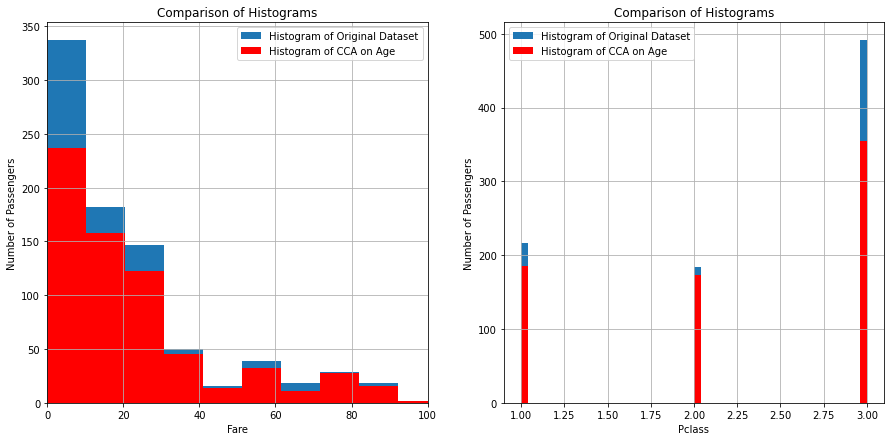

In [14]:
# Visualization of Histogram Differences between the Original Dataset and CCA for the Variable `Age` Only
# We Will Check the Effect of CCA Only to Variable `Fare` and `Pclass`

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

data_titanic.Fare.hist(bins=50, ax=ax[0], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Fare'].hist(bins=50, ax=ax[0], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Age
ax[0].set_xlim(0,100)
ax[0].set_title('Comparison of Histograms')
ax[0].set_xlabel('Fare')
ax[0].set_ylabel('Number of Passengers')
ax[0].legend(loc="upper right")

data_titanic.Pclass.hist(bins=50, ax=ax[1], label='Histogram of Original Dataset') # Histogram of original dataset
data_titanic.dropna(axis=0, subset=['Age'])['Pclass'].hist(bins=50, ax=ax[1], color='red', label='Histogram of CCA on Age') # Histogram of CCA on Pclass
ax[1].set_title('Comparison of Histograms')
ax[1].set_xlabel('Pclass')
ax[1].set_ylabel('Number of Passengers')
ax[1].legend(loc="upper left")

Comparing the red and blue histograms we can observe that the distribution of the entire dataset before CCA do not match with the dataset after CCA. There are a lot of people for whom `Age` is missing, that paid lower fares to get on the titanic.

Similarly, the original dataset shows a higher proportion of people that travelled in `Pclass` 3. 

Given that the distribution of the variables between the original dataset and that one after CCA are not equivalent, CCA is not a good option.

---
### Suggestions

In practice, **CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible.**

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option. 

For building machine learning models, it would recommend replacing missing values by any of the methods. However, for a quick analysis, if the amount of missing values is not big, this could be the easiest and fastest approach.

## A.5. Mean and Median Imputation

### Explanation

**Imputation is the act of replacing missing data with statistical estimates of the missing values.** The goal of any imputation technique is to produce a complete dataset that can be used for machine learning or deep learning.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable with :
* **Mean** : if the variable has a **Normal/Gaussian distribution**.
* **Median** : if the variable has a **skewed distribution**.

**Assumptions** : The data are missing completely at random (MCAR). 

If this is the case, we can think of replacing the NA with the most frequent occurrence of the variable, which is the mean if the variable has a Gaussian distribution, or the median otherwise.

**Advantages** :
* Easy to implement
* Fast way of obtaining complete datasets

**Limitations** :
* Distortion of original variance
  
  When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations (since the imputed values do not differ from the mean or from each other). Therefore leading to underestimation of the variance.

* Distortion of covariance/correlation with remaining variables within the dataset

  In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. This is because we may be destroying intrinsic correlations since the mean/median that now replace NA will not preserve the relation with the remaining variables.

**Imputation should be done over the training set, and then propagated to the test set.** This means that the mean/median to be used to fill missing values both in train and test set, should be extracted from the train set only.

### Case Study

We will use Titanic dataset for this demonstration and use Mean/Median Imputation to handle missing values.

In [15]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

Skewness :  0.3361317253050765


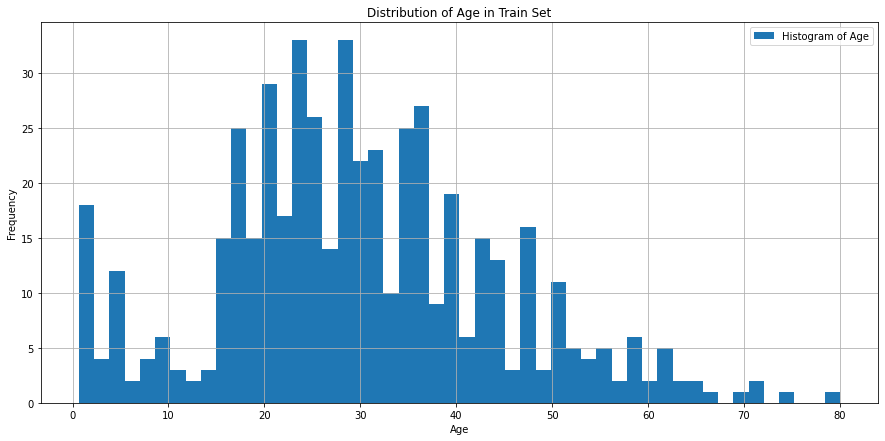

In [16]:
# Let's Check Type of Distirbution of Variable `Age`
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.hist(bins=50, ax=ax, label='Histogram of Age') # Histogram of original dataset
ax.set_title('Distribution of Age in Train Set')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.legend(loc="upper right")

print('Skewness : ', X_train_titanic.Age.skew())

In [17]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [18]:
# Function to Filling Missing Values with Zeroes, Mean, and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  
  return df

In [19]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0


---
#### Effect of Mean/Median Imputation

Mean/median imputation alters the variance of the original distribution of the variable

In [20]:
# We can see a change in the variance after imputation

print('Variance - Orignal                 : ', X_train_titanic['Age'].std())
print('Variance - After Mean Imputation   : ', X_train_titanic['Age_mean'].std())
print('Variance - After Median Imputation : ', X_train_titanic['Age_median'].std())

Variance - Orignal                 :  14.506993804588454
Variance - After Mean Imputation   :  13.019703562523889
Variance - After Median Imputation :  13.024746215318785


<Figure size 432x288 with 0 Axes>

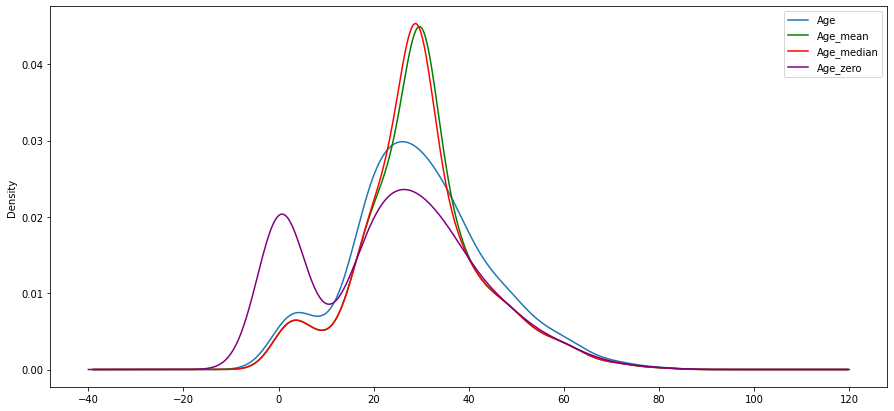

In [21]:
# Visualization Variable `Age` Before and After Imputation

fig = plt.figure()
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax)
X_train_titanic.Age_mean.plot(kind='kde', ax=ax, color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax, color='red')
X_train_titanic.Age_zero.plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the median imputation distorts the original distribution of the variable `Age`. The transformed variable shows more values around the mean/median value.

Filling NA with `0` also distorts the distribution of the original variable, generating an accumulation of values around `0`. We will see in the next section a method of NA imputation that preserves variable distribution.

In [22]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, and Median

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Train set zero imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test set zero imputation')
print('Random Forests zero imputation roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Train set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test set mean imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Train set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test set median imputation')
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

Train set zero imputation
Random Forests roc-auc: 0.7555855621353116
Test set zero imputation
Random Forests zero imputation roc-auc: 0.7490476190476191

Train set mean imputation
Random Forests roc-auc: 0.751648554261296
Test set mean imputation
Random Forests roc-auc: 0.7698809523809523

Train set median imputation
Random Forests roc-auc: 0.7515021366130887
Test set median imputation
Random Forests roc-auc: 0.7697619047619049



We see that mean/median imputation leads to better performance rather than using zero (`0`). Why?

In [23]:
print('Average total survival :', X_train_titanic.Survived.mean())

print('\nAverage real survival of children : ', X_train_titanic[X_train_titanic.Age<15].Survived.mean())
print('Average survival of children when using Age imputed with zeroes : ', X_train_titanic[X_train_titanic.Age_zero<15].Survived.mean())
print('Average survival of children when using Age imputed with mean   : ', X_train_titanic[X_train_titanic.Age_mean<15].Survived.mean())
print('Average survival of children when using Age imputed with median : ', X_train_titanic[X_train_titanic.Age_median<15].Survived.mean())

Average total survival : 0.3884430176565008

Average real survival of children :  0.5740740740740741
Average survival of children when using Age imputed with zeroes :  0.38857142857142857
Average survival of children when using Age imputed with mean   :  0.5740740740740741
Average survival of children when using Age imputed with median :  0.5740740740740741


Evaluation notes : 
* **Children were more likely to survive the catastrophe** (0.57 for children vs 0.38 for the entire Titanic). Thus, smaller values of `Age` are a good indicator of survival.

* **When we replace NA with zeroes, we are masking the predictive power of `Age`.** After zero imputation, it looks like children did not have a greater chance of survival, and therefore the model loses predictive power.

* On the other hand, **replacing NA with the mean/median, preserves the predictive power of the variable Age**, as smaller Age values will favour survival.

---
### Suggestions

Replacement of NA with mean/median is widely used in the data science community and in various data science competitions. 

Typically, mean/median imputation is done together with adding a variable to capture those observations where the data was missing, thus covering 2 angles: if the data was missing completely at random, this would be contemplated by the mean/median imputation, and if it wasn't this would be captured by the additional variable.

In addition, both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.

## A.6. Random Sample Imputation

### Explanation

**Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA.** 

Random Sample Imputation is in principle similar to mean/median imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.

By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.

**Assumptions :**
* The data are Missing Completely At Random (MCAR). 

  If this is the case, it makes sense to substitute the missing values, by values extracted from the original variable distribution. 

* From a probabilistic  point of view, values that are more frequent (like the mean or the median) will be selected more often (because there are more of them to select from), but other less frequent values will be selected as well. Thus, the variance of the variable is preserved. 

  The rationale is to replace the population of missing values with a population of values with the same distribution of the variable.

**Advantages :**
* Easy to implement
* Fast way of obtaining complete datasets
* Preserves the variance of the variable

**Limitations :** Randomness

Randomness may not seem much of a concern when replacing missing values for data competitions, where the whole batch of missing values is replaced once and then the dataset is scored and that is the end of the problem. However, in business scenarios the situation is very different.

---
Imagine for example the scenario of Mercedes-Benz, where they are trying to **predict how long a certain car will be in the garage before it passes all the security tests.** 

Scenarios : 
* Today, they receive a car with missing data in some of the variables. 
* They run the machine learning model to predict how long this car will stay in the garage.
* The model replaces missing values by a random sample of the variable and then produces an estimate of time. 
* Tomorrow, when they run the same model on the same car with the same data, the model will randomly assign values to the missing data, that may or may not be the same as the ones it selected previously, 
* The final estimation of time in the garage, may or may not be the same as the one obtained the day before.
* Because the missing data is randomly filled with values, the 2 cars, that are exactly the same, may end up with different estimates of time in the garage. 

This may sound completely trivial and unimportant, however, businesses must follow a variety of regulations, and some of them require that the **same treatment be provided to the same situation**. So if instead of cars, these were people *applying for a loan*, or *people seeking some disease treatment*, **the machine learning model would end up providing different solutions to candidates that are otherwise in the same conditions. And this is not fair or acceptable.**

It is still possible to replace missing data by random sample, but these randomness needs to be controlled, so that individuals in the same situation end up with the same scores and therefore solutions.

Finally, another potential limitation of random sampling, similarly to replacing with the mean and median, is that estimates of covariance and correlations with other variables in the dataset may also be washed off by the randomness.

---
### Case Study

In [24]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [25]:
# Display Value of Median Before Imputation

mean_titanic_age = X_train_titanic.Age.mean()
median_titanic_age = X_train_titanic.Age.median()

print('Mean Value - Train Set - Before Imputation   : ', mean_titanic_age)
print('Median Value - Train Set - Before Imputation : ', median_titanic_age)

Mean Value - Train Set - Before Imputation   :  29.915338645418327
Median Value - Train Set - Before Imputation :  29.0


In [26]:
# Function to Filling Missing Values with Zeroes and Median

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample
  
  return df

In [27]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C,39.000000,39.0,39.0,39.0
192,193,1,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,19.000000,19.0,19.0,19.0
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,29.915339,29.0,0.0,14.5
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S,36.000000,36.0,36.0,36.0


#### Effect of Random Sample Imputation

Random sampling preserves the original distribution of the variable.

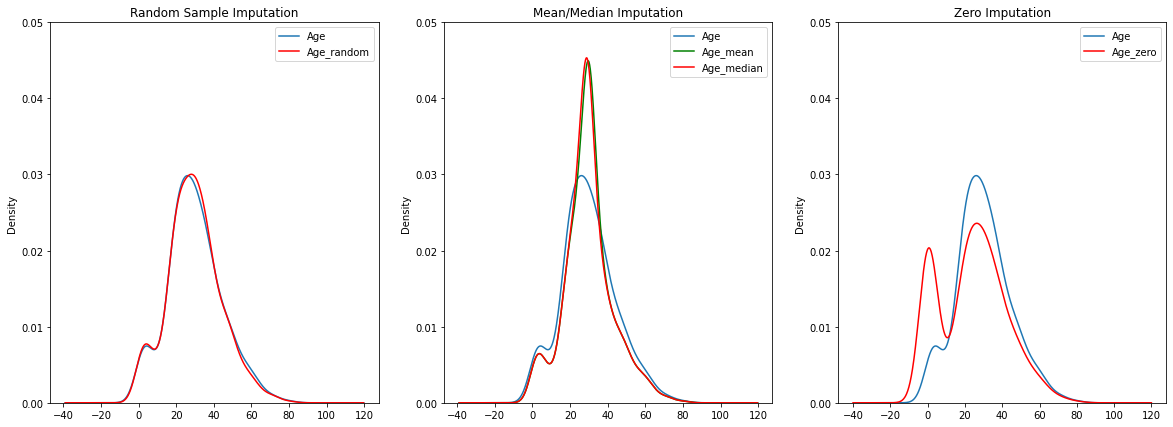

In [28]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train_titanic.Age.plot(kind='kde', ax=ax[0])
X_train_titanic.Age_random.plot(kind='kde', ax=ax[0], color='red')
lines, labels = ax[0].get_legend_handles_labels()
ax[0].set_ylim(0, 0.05)
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('Random Sample Imputation')
ax[0].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[1])
X_train_titanic.Age_mean.plot(kind='kde', ax=ax[1], color='green')
X_train_titanic.Age_median.plot(kind='kde', ax=ax[1], color='red')
lines, labels = ax[1].get_legend_handles_labels()
ax[1].set_ylim(0, 0.05)
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('Mean/Median Imputation')
ax[1].legend(loc="upper right")

X_train_titanic.Age.plot(kind='kde', ax=ax[2])
X_train_titanic.Age_zero.plot(kind='kde', ax=ax[2], color='red')
lines, labels = ax[2].get_legend_handles_labels()
ax[2].set_ylim(0, 0.05)
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('Zero Imputation')
ax[2].legend(loc="upper right")

We can see that replacing missing values with a random sample from the training set preserves the original distribution of the variable. Whereas replacing by the mean, median, or zeros, alters the distribution.

In [29]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=39, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7555855621353116
Test - Random Forests roc-auc. : 0.7490476190476191

Using mean imputation
Train - Random Forests roc-auc : 0.751648554261296
Test - Random Forests roc-auc  : 0.7698809523809523

Using median imputation
Train - Random Forests roc-auc : 0.7515021366130887
Test - Random Forests roc-auc. : 0.7697619047619049

Using random sample imputation
Train - Random Forests roc-auc : 0.7542027287911325
Test - Random Forests roc-auc. : 0.754375



We can see that replacing the NA with a random sample of the dataset, does not perform as well as when replacing with the median. **However, this is entirely due to randomness.** Try to change the seed (`random_sate`) in the `impute_na` function, then recreate the `X_train_titanic` and `X_test_titanic`, and you will see how the performance of your model varies. In some cases, the performance will be better.

---
So if the performance of median imputation vs random sample imputation are similar, which method should I use?

Choosing which imputation method to use, will depend on various things:
* Do you want to **preserve the distribution** of the variable?
* Are you willing to **accept an element of randomness** in your imputation method?
* **What is your aims?** Are you aiming to win a data competition? or to make business driven decisions?
* You must remeber that randomness can **lead to different scores** being assigned to the same observation.

**There is no 'correct' answer to which imputation method you can use**, it rather depends on what you are trying to achieve.


---
#### Controlling the Randomness

We can attribute a different seed to each observation, and in fact, we can make this seed **depend on an alternative variable of the same observation**. 

Example : 2 passengers or more who paid exactly the same `Fare`, they would get exactly the same `Age` value if the value of `Age` is missing.

This is a way of controlling the randomness. Using the `Fare` to set the random state, you guarantee that for 2 passengers with equal `Fare`, the `Age` will be replaced with the same number, and therefore the 2 passengers will get the same probability of survival.

In real life datasets, you will build models that use tens of variables or more. So in cases like those, you can think of **picking the 3-5 more important variables, those that have the strongest impact** on the output of the machine learning model, and combine them to create the `random_state`. For example, customers that share the 3-5 main variable values, will get the same scores.

---
### Suggestions

Replacement of missing values by random sample, although similar in concept to replacement by the median or mean, is **not as widely used** in the data science community as the mean/median imputation, presumably because of the element of randomness.

However, it is a valid approach, with advantages over mean/median imputation as it preserves the distribution of the variable. And if you are mindful of the element of randomness and account for it somehow, this may as well be your method of choice.

## A.7. Adding A Variable To Capture Missing Values

### Explanation

In previous lectures we studied how to replace missing values by mean/median imputation or by extracting a random sample of the variable for those instances where data is available, and using those values to replace the missing values. We also discussed that these 2 methods assume that the missing data are missing completely at random (MCAR).

So **what if the data are not missing completely at random?** By using this procedure, we would be missing important, predictive information.

How can we prevent that?

**We can capture the importance of missingness by creating an additional variable indicating whether the data was missing for that observation (`1`) or not (`0`)**. The additional variable is a binary variable :
* `0` indicating that a value was present for that observation, and 
* `1` indicating that the value was missing for that observation.

**Advantages :**
* Easy to implement
* Captures the importance of missingess if there is one

**Disadvantages :** Expands the feature space

* This method of imputation will add 1 variable per variable in the dataset with missing values. 

* So if a dataset contains 10 features, and all of them have missing values, we will end up with a dataset with 20 features. 

  The original features where we replaced the missing values by the mean/median (or random sampling), and additional 10 features, indicating for each of the variables, whether the value was missing or not.

This may not be a problem in datasets with tens to a few hundreds of variables, but if your original dataset contains thousands of variables, by creating an additional variable to indicate NA, **you will end up with very big datasets**.

In addition, data tends to be missing for the same observation on multiple variables, so it may also be the case, that many of your added variables will be actually similar to each other.

---
### Case Study - Titanic Dataset

In [30]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [31]:
# Function to Filling Missing Values with Zeroes, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [32]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,0


In [33]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc. : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc. : 0.740654761904762

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc. : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc. : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc. : 0.7614880952380954



In the Titanic dataset, we can see that models produce the same accuracy in the performance of the Random Forest. Let's try this method in regression problem.

### Case Study - House Prices Dataset

In [34]:
# For Demonstration Purposes, We Are Going to Use These Columns

cols_to_use = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','WoodDeckSF', 'BsmtUnfSF',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

data_house_prices = data_house_prices_ori.copy()
data_house_prices = data_house_prices[cols_to_use + ['SalePrice']]
data_house_prices.head(10)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
0,7,856,856,1710,0,150,65.0,196.0,2003.0,208500
1,6,1262,1262,1262,298,284,80.0,0.0,1976.0,181500
2,7,920,920,1786,0,434,68.0,162.0,2001.0,223500
3,7,756,961,1717,0,540,60.0,0.0,1998.0,140000
4,8,1145,1145,2198,192,490,84.0,350.0,2000.0,250000
5,5,796,796,1362,40,64,85.0,0.0,1993.0,143000
6,8,1686,1694,1694,255,317,75.0,186.0,2004.0,307000
7,7,1107,1107,2090,235,216,NaN,240.0,1973.0,200000
8,7,952,1022,1774,90,952,51.0,0.0,1931.0,129900
9,5,991,1077,1077,0,140,50.0,0.0,1939.0,118000


In [35]:
# Check Missing Values in House Prices Dataset

data_house_prices.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [36]:
# Let's Separate Dataset into Training Set and Testing Set

X_train, X_test, y_train, y_test = train_test_split(data_house_prices, 
                                                    data_house_prices.SalePrice, 
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

In [37]:
# Display X_train

X_train

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice
64,7,1057,1057,2034,576,318,NaN,573.0,1998.0,219500
682,6,1291,1291,1291,307,288,NaN,0.0,1996.0,173000
960,5,858,858,858,117,162,50.0,0.0,NaN,116500
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000
...,...,...,...,...,...,...,...,...,...,...
763,8,1252,1268,2365,0,89,82.0,673.0,1999.0,337000
835,4,1067,1067,1067,290,625,60.0,0.0,1996.0,128000
1216,6,0,1318,1902,0,0,68.0,0.0,1978.0,112000
559,7,1374,1557,1557,143,1374,NaN,18.0,2003.0,234000


Skewness - LotFrontage :  1.8847801735623813
Skewness - MasVnrArea  :  2.7582019163711244
Skewness - GarageYrBlt :  -0.6669763943317643


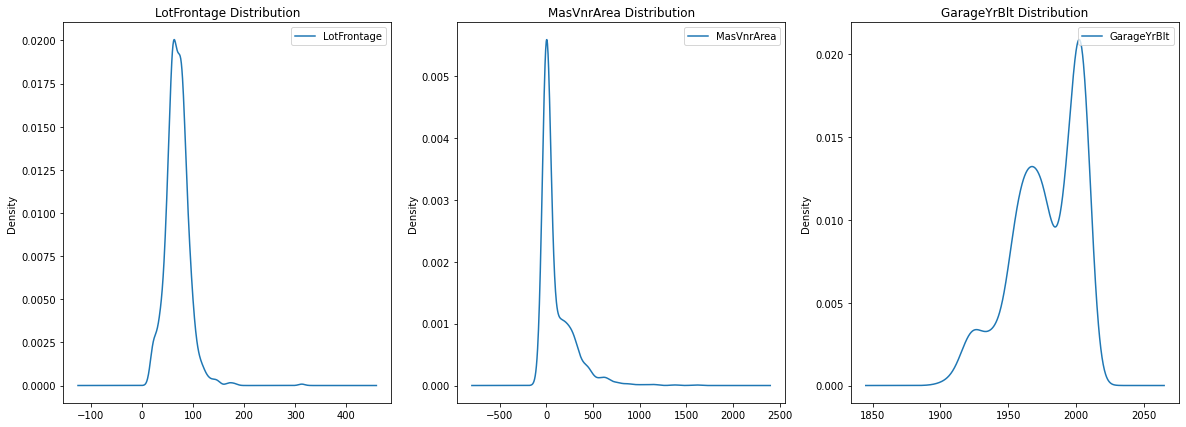

In [38]:
# Visualization Variable `Age` Before and After Random Sample Imputation

fig, ax = plt.subplots(1, 3, figsize=(20, 7))

X_train.LotFrontage.plot(kind='kde', ax=ax[0])
lines, labels = ax[0].get_legend_handles_labels()
ax[0].legend(lines, labels, loc='best')
ax[0].set_title('LotFrontage Distribution')
ax[0].legend(loc="upper right")

X_train.MasVnrArea.plot(kind='kde', ax=ax[1])
lines, labels = ax[1].get_legend_handles_labels()
ax[1].legend(lines, labels, loc='best')
ax[1].set_title('MasVnrArea Distribution')
ax[1].legend(loc="upper right")

X_train.GarageYrBlt.plot(kind='kde', ax=ax[2])
lines, labels = ax[2].get_legend_handles_labels()
ax[2].legend(lines, labels, loc='best')
ax[2].set_title('GarageYrBlt Distribution')
ax[2].legend(loc="upper right")

print('Skewness - LotFrontage : ', X_train.LotFrontage.skew())
print('Skewness - MasVnrArea  : ', X_train.MasVnrArea.skew())
print('Skewness - GarageYrBlt : ', X_train.GarageYrBlt.skew())

We observed based on visualization or skewness values that **all variables with missing values have skewed distribution**. So, we will using Median instead of Mean.

In [39]:
# Function to Filling Missing Values with Median and 0/1

def impute_na(df, variable, median):
  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  df[variable].fillna(median, inplace=True)

  return df

In [40]:
# Display Median Value for Variables that have Missing Values

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].median()

LotFrontage      69.0
MasVnrArea        0.0
GarageYrBlt    1979.0
dtype: float64

In [41]:
# Impute Missing Values
X_train = impute_na(X_train, 'LotFrontage', X_train['LotFrontage'].median())
X_train = impute_na(X_train, 'MasVnrArea', X_train['MasVnrArea'].median())
X_train = impute_na(X_train, 'GarageYrBlt', X_train['GarageYrBlt'].median())

X_test = impute_na(X_test, 'LotFrontage', X_test['LotFrontage'].median())
X_test = impute_na(X_test, 'MasVnrArea', X_test['MasVnrArea'].median())
X_test = impute_na(X_test, 'GarageYrBlt', X_test['GarageYrBlt'].median())

X_train.head(15)

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt,SalePrice,LotFrontage_NA,MasVnrArea_NA,GarageYrBlt_NA
64,7,1057,1057,2034,576,318,69.0,573.0,1998.0,219500,1,0,0
682,6,1291,1291,1291,307,288,69.0,0.0,1996.0,173000,1,0,0
960,5,858,858,858,117,162,50.0,0.0,1979.0,116500,0,0,1
1384,6,560,698,1258,0,356,60.0,0.0,1939.0,105000,0,0,0
1100,2,290,438,438,0,0,60.0,0.0,1930.0,60000,0,0,0
416,6,672,672,1400,0,463,74.0,203.0,1978.0,149500,0,0,0
1034,5,920,954,954,0,920,50.0,0.0,1938.0,119750,0,0,0
853,6,1127,1445,1445,180,563,69.0,115.0,1964.0,158000,1,0,0
472,6,547,1072,1072,0,88,35.0,80.0,2005.0,148000,0,0,0
1011,5,0,1664,1664,0,0,75.0,0.0,1979.0,100000,0,0,1


In [42]:
# Define List of Columns with 0/1 Imputation

cols_with_na = list(X_train.columns)
cols_with_na.remove('SalePrice')

print('Default Column            : ', cols_to_use)
print('All Columns in X_train    : ', list(X_train.columns))
print('Final Column for Training : ', cols_with_na)

Default Column            :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
All Columns in X_train    :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']
Final Column for Training :  ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF', 'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'LotFrontage_NA', 'MasVnrArea_NA', 'GarageYrBlt_NA']


In [43]:
# Standarize Dataset

## With Median Imputation and Without 0/1 Imputation
scaler = StandardScaler()
X_train_no_na = scaler.fit_transform(X_train[cols_to_use])
X_test_no_na = scaler.transform(X_test[cols_to_use])

## With Median Imputation and With 0/1 Imputation
scaler = StandardScaler()
X_train_all = scaler.fit_transform(X_train[cols_with_na])
X_test_all = scaler.transform(X_test[cols_with_na])

---
We will make models using Linear Regression to solve this House Pirces problem.

In [44]:
# Let's Compare the Performance of Linear Regression filled with Median vs Median + 0/1

linreg = LinearRegression()
linreg.fit(X_train_no_na, y_train)
pred_train_no_na = linreg.predict(X_train_no_na)
pred_test_no_na = linreg.predict(X_test_no_na)

print('Using Median Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_no_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_no_na)))
print('')

linreg = LinearRegression()
linreg.fit(X_train_all, y_train)
pred_train_with_na = linreg.predict(X_train_all)
pred_test_with_na = linreg.predict(X_test_all)

print('Using Median + 0/1 Imputation')
print('MSE - Train : {}'.format(mean_squared_error(y_train, pred_train_with_na)))
print('MSE - Test  : {}'.format(mean_squared_error(y_test, pred_test_with_na)))
print('')

## Calculate Differences between `Median + 0/1 Imputation` and `Median Imputation`
diff = mean_squared_error(y_test, pred_test_no_na) - mean_squared_error(y_test, pred_test_with_na)
print('Differences : ', diff)

Using Median Imputation
MSE - Train : 1161895545.483203
MSE - Test  : 2213352533.0368676

Using Median + 0/1 Imputation
MSE - Train : 1157194541.944443
MSE - Test  : 2198183078.1270685

Differences :  15169454.909799099


Here, when we build a model using the additional variable to capture missingness of data, we observe :
* In the test set, the MSE is smaller. 
  
  This means that the difference between the real value and the estimated value is smaller, and thus our model performs better.

* There is a difference of ~15 million between the model that replaces with the median and the one that uses median imputation in combination with the additional variables to capture missingness. 

  So even when the difference in MSE seems small, when we boil it down to business value, the impact is massive.

---
### Suggestions

Typically, **Mean/Median Imputation is done together with adding a variable to capture those observations where the data was missing**, thus covering 2 angles: if the data was Missing Completely At Random, this would be contemplated by the Mean/Median Imputation, and if it wasn't this would be captured by the additional variable.

## A.8. Arbitrary Value Imputation

### Explanation

In case of missing values are not MCAR, we can use several methods below:

* **Adding an additional binary variable** to indicate whether the value is missing (`1`) or not (`0`).

* **Replacing the NA by a value** 
  - Sometimes this value at a far end of the distribution
  - This method is used in several Kaggle competitions. 
  - It consists of replacing the NA by an arbitrary value. Any of your creation, but ideally different from the median/mean/mode.

**Advantages :**
* Easy to implement.
* Captures the importance of missingess if there is one.

**Disadvantages :**
* Distorts the original distribution of the variable.
* If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution.
* Hard to decide which value to use.
 If the value is outside the distribution it may mask or create outliers

When variables are captured by third parties, like credit agencies, they place arbitrary numbers already to signal this missingness. So,sometimes this technique is **common practice in real life data collections**.

### Case Study

In [45]:
# Let's Separate Dataset into Training Set and Testing Set

data_titanic = data_titanic_ori.copy()
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(data_titanic, 
                                                                                    data_titanic.Survived, 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)
X_train_titanic.shape, X_test_titanic.shape

((623, 12), (268, 12))

In [46]:
# Function to Filling Missing Values with Zeroes, Hundreds, Mean, Median, and Adding A Variable

def impute_na(df, variable, mean_value, median_value):
  df[variable+'_mean'] = df[variable].fillna(mean_value)
  df[variable+'_median'] = df[variable].fillna(median_value)
  df[variable+'_zero'] = df[variable].fillna(0)
  df[variable+'_hundred'] = df[variable].fillna(100)
  df[variable+'_random'] = df[variable]
  
  ## Extract the random sample to fill the NA
  random_sample = X_train_titanic[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
  
  ## Pandas needs to have the same index in order to merge datasets
  random_sample.index = df[df[variable].isnull()].index

  ## Merge into one dataframe
  df.loc[df[variable].isnull(), variable+'_random'] = random_sample

  df[variable+'_NA'] = np.where(df[variable].isnull(), 1, 0)
  
  return df

In [47]:
# Imputation Against Variable `Age`

X_train_titanic = impute_na(X_train_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_test_titanic = impute_na(X_test_titanic, 'Age', mean_titanic_age, median_titanic_age)
X_train_titanic.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median,Age_zero,Age_hundred,Age_random,Age_NA
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,51.000000,51.0,51.0,51.0,51.0,0
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,49.000000,49.0,49.0,49.0,49.0,0
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9000,NaN,S,1.000000,1.0,1.0,1.0,1.0,0
124,125,0,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S,54.000000,54.0,54.0,54.0,54.0,0
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C,29.915339,29.0,0.0,100.0,16.0,1
549,550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.7500,NaN,S,8.000000,8.0,8.0,8.0,8.0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,24.000000,24.0,24.0,24.0,24.0,0
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,20.000000,20.0,20.0,20.0,20.0,0
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S,30.000000,30.0,30.0,30.0,30.0,0
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,24.000000,24.0,24.0,24.0,24.0,0


In [48]:
# Let's Compare the Performance of Random Forests using `Age` filled with Zeros, Mean, Median, and Random Sample

## Model with `Age_zero`
rf_zero = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_zero.fit(X_train_titanic[['Age_zero', 'Fare']], y_train_titanic)

pred_zero_train = rf_zero.predict_proba(X_train_titanic[['Age_zero', 'Fare']])
pred_zero_test = rf_zero.predict_proba(X_test_titanic[['Age_zero', 'Fare']])

print('Using zero imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_zero_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_zero_test[:,1])))
print()

## Model with `Age_hundred`
rf_hundred = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_hundred.fit(X_train_titanic[['Age_hundred', 'Fare']], y_train_titanic)

pred_hundred_train = rf_hundred.predict_proba(X_train_titanic[['Age_hundred', 'Fare']])
pred_hundred_test = rf_hundred.predict_proba(X_test_titanic[['Age_hundred', 'Fare']])

print('Using hundred imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_hundred_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_hundred_test[:,1])))
print()

## Model with `Age_mean`
rf_mean = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_mean.fit(X_train_titanic[['Age_mean', 'Fare']], y_train_titanic)

pred_mean_train = rf_mean.predict_proba(X_train_titanic[['Age_mean', 'Fare']])
pred_mean_test = rf_mean.predict_proba(X_test_titanic[['Age_mean', 'Fare']])

print('Using mean imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_mean_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_mean_test[:,1])))
print()

## Model with `Age_median`
rf_median = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_median.fit(X_train_titanic[['Age_median', 'Fare']], y_train_titanic)

pred_median_train = rf_median.predict_proba(X_train_titanic[['Age_median', 'Fare']])
pred_median_test = rf_median.predict_proba(X_test_titanic[['Age_median', 'Fare']])

print('Using median imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_median_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_median_test[:,1])))
print()

## Model with `Age_random`
rf_random = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_random.fit(X_train_titanic[['Age_random', 'Fare']], y_train_titanic)

pred_random_train = rf_random.predict_proba(X_train_titanic[['Age_random', 'Fare']])
pred_random_test = rf_random.predict_proba(X_test_titanic[['Age_random', 'Fare']])

print('Using random sample imputation')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_random_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_random_test[:,1])))
print()

## Model with `Age_NA`
rf_NA = RandomForestClassifier(n_estimators=100, random_state=19, max_depth=3)
rf_NA.fit(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']], y_train_titanic)

pred_NA_train = rf_NA.predict_proba(X_train_titanic[['Age_mean', 'Age_NA', 'Fare']])
pred_NA_test = rf_NA.predict_proba(X_test_titanic[['Age_mean', 'Age_NA', 'Fare']])

print('Using Capturing Missing Value')
print('Train - Random Forests roc-auc : {}'.format(roc_auc_score(y_train_titanic, pred_NA_train[:,1])))
print('Test - Random Forests roc-auc  : {}'.format(roc_auc_score(y_test_titanic, pred_NA_test[:,1])))
print()

Using zero imputation
Train - Random Forests roc-auc : 0.7553306869699139
Test - Random Forests roc-auc  : 0.740654761904762

Using hundred imputation
Train - Random Forests roc-auc : 0.7543491464393397
Test - Random Forests roc-auc  : 0.7628273809523809

Using mean imputation
Train - Random Forests roc-auc : 0.749154031365914
Test - Random Forests roc-auc  : 0.7630059523809525

Using median imputation
Train - Random Forests roc-auc : 0.7500271143792976
Test - Random Forests roc-auc  : 0.7614285714285715

Using random sample imputation
Train - Random Forests roc-auc : 0.7534001431639226
Test - Random Forests roc-auc  : 0.756875

Using Capturing Missing Value
Train - Random Forests roc-auc : 0.7548209366391183
Test - Random Forests roc-auc  : 0.7614880952380954



Conclusions (based on personal perspective) : 
* We can see that replacing NA with `100` makes the models perform better than replacing NA with `0`. 
* This is because children were more likely to survive than adults. 
* Filling NA with zeroes, distorts this relation and makes the models loose predictive power.

### Suggestions

The arbitrary value has to be determined for each variable specifically. For example, for this dataset, the choice of **replacing NA in `Age` by `0` or `100` are valid, because none of those values are frequent in the original distribution of the variable, and they lie at the tails of the distribution.**

However, if we were to replace NA in `Fare`, those values are not good any more, because we can see that `Fare` can take values of up to `500`. So we might want to consider using `500` or `1000` to replace NA instead of `100`.

**As you can see this is totally arbitrary and yet, it is used in the industry.** Typical values chose by companies are -9999 or 9999, or similar.

# B. Conclusions of Missing Values

## Which missing value imputation method shall I use and when?

There is no straight forward answer to this question, and which method to use on which occasion is not set on stone. **This is totally up to you**. 

Different methods make different assumptions and have different advantages and disadvantages.

## Guidelines

* Check of missing data mechanism :
  - MCAR : 
    * Complete Case Analysis, 
    * Mean Imputaion (numeric variable with Gaussian/Normal Distribution), 
    * Median Impuation (numeric variable with skewed distribution)
    * Mode Imputation (categorical variable)
    * Add Missing Label Imputation (categorical variable)
    * Random Sample Imputation
    * Arbitray Value Imputation
  - MAR, MNAR : 
    * Add 0/1 Imputation 
    * Arbitray Value Imputation
    * Add Missing Label Imputation (categorical variable)
    * You can combined it with Mean/Median/Mode Imputation
* If missing values are too small : Complete Case Analysis
* If missing values are less than 5% of the variable :
  - Mean Imputation
  - Median Imputation
  - Mode Imputation
  - Random Sample Imputation
* If missing values are more than 5% of the variable:
  - Mean/Median/Mode Imputation + adding 0/1 Imputation
  - Add Missing Label Imputation (categorical variable)

If the number of NA in a variable is small, they are unlikely to have a strong impact on the variable / target that you are trying to predict. Therefore, treating them specially, will most certainly add noise to the variables. Therefore, it is more useful to replace by mean/random sample to preserve the variable distribution.

If the variable / target you are trying to predict is however highly unbalanced, then it might be the case that this small number of NA are indeed informative. You would have to check this out.

---
## Final Note

NA imputation for data competitions and business settings can be approached differently. **In data competitions, a tiny increase in performance can be the difference between 1st or 2nd place.** Therefore, you may want to **try all the feature engineering methods** and use the one that gives the best machine learning model performance. It may be the case that different NA imputation methods help different models make better predictions.

In business scenarios, scientist **don't usually have the time to do lengthy studies**, and may therefore choose to streamline the feature engineering procedure. In these cases, it is common practice to follow the guidelines above, taking into account the exceptions, and do the same processing for all features.

This streamlined pre-processing may not lead to the most predictive features possible, yet it makes feature engineering and machine learning models delivery substantially faster. Thus, the business can start enjoying the power of machine learning sooner.